# RICE LEAF DISEASE DETECTION


## INTRODUCTION
The rice leaf suffers from several bacterial, viral, or fungal diseases and these diseases reduce rice production significantly. To sustain rice demand for a vast population globally.The rice leaves related diseases often pose threats to the sustainable production of rice affecting many farmers around the world. Early diagnosis and appropriate remedy of the rice leaf infection is crucial in facilitating healthy growth of the rice plants to ensure adequate supply and food security to the rapidly increasing population.
### RICE LEAF DISEASE:
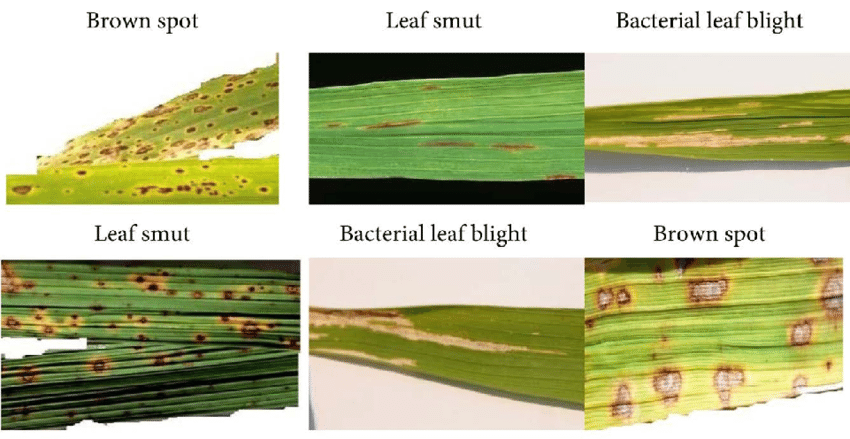

### WE HAVE DEVICE THE PROJECT INTO MULTIPLE STEPS
* Importing library
* Loading data
* Preparing data
* Data Processing 
* Model building
* Training
* Evaluation
* Testing

### DATA SUMMARY
This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

Classes

* Leaf smut
* Brown spot
* Bacterial leaf blight

## PYTHON IMPLIMENTATION

### IMPORTING NECESSARY LIBRARY

In [1]:
import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


In [2]:
## To connect Google Drive (GDrive) with Colab
# Step:2 Mount drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### MAKE SUBSET OF TRAIN, TEST, VALIDATION

In [4]:
import splitfolders
splitfolders.ratio(r"D:/Career/PRCP-1001-RiceLeaf/Data/RiceLeafClass/Labeled Data", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 28 files [00:00, 275.12 files/s]

Copying files: 119 files [00:00, 264.56 files/s]


In [7]:
# Sorting the path of data into veriable
train_dir = 'D:/Career/PRCP-1001-RiceLeaf/Data/RiceLeafClass/output/train'  #Location of training images
validation_dir = 'D:/Career/PRCP-1001-RiceLeaf/Data/RiceLeafClass/output/val' # Location of test images
test_dir ='D:/Career/PRCP-1001-RiceLeaf/Data/RiceLeafClass/output/test' # Location of test images

### GENERATING TRAINING AND VALIDATION BATCHES OF IMAGES

In [8]:
# Generating batches of image data
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')




    




Found 95 images belonging to 3 classes.
Found 11 images belonging to 3 classes.


### PLOTTING TRAIN IMAGES WITH THEIR LABELS

In [9]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

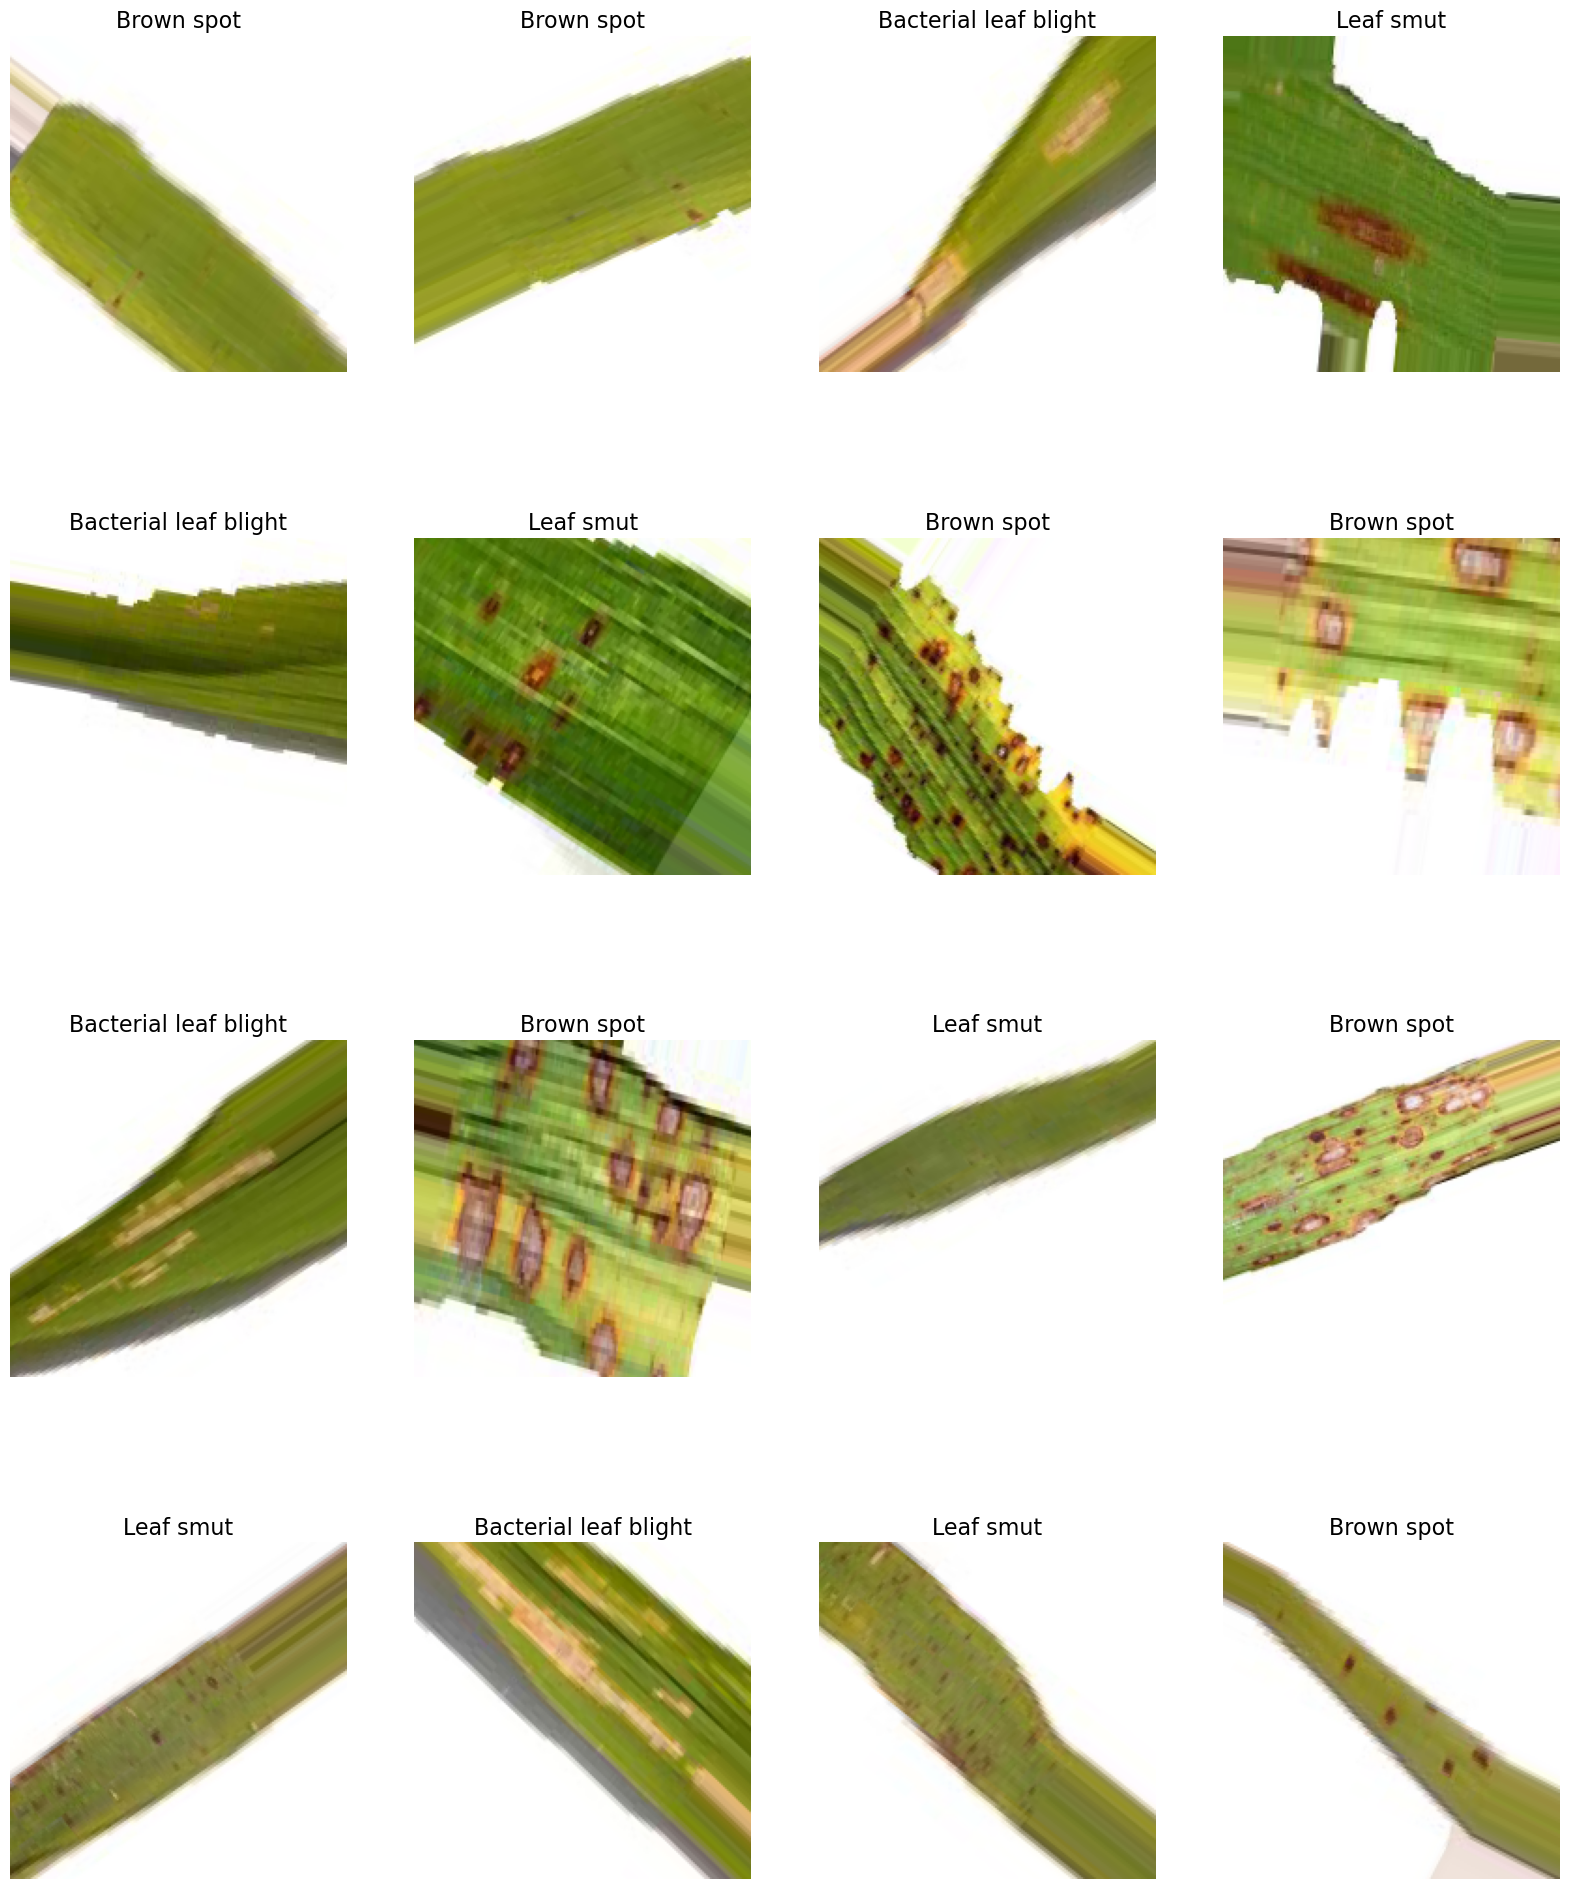

In [10]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

- The images for Bacterial leaf blight have around 300*87 dimensions, accounting to around 98 dpi quality.
- The images for Leaf smut has around around the same dimensions except for few cases where the dimensions is little bit higher.
- the images for unevenly distributed dimensional data which may cause inaccuracy during modeling


## CNN MODEL ARCHITECTURE

- A simple CNN model is constructed as a baseline for this classification task. 
- The model is composed of a series of convolutional layers followed by max-pooling layers, a dropout layer for regularization, and a flattening layer that feeds into a dense network for classification.

In [12]:

from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation ='softmax'))

### PLOTTING GRAPHICAL REPRESENTATION OF MODEL

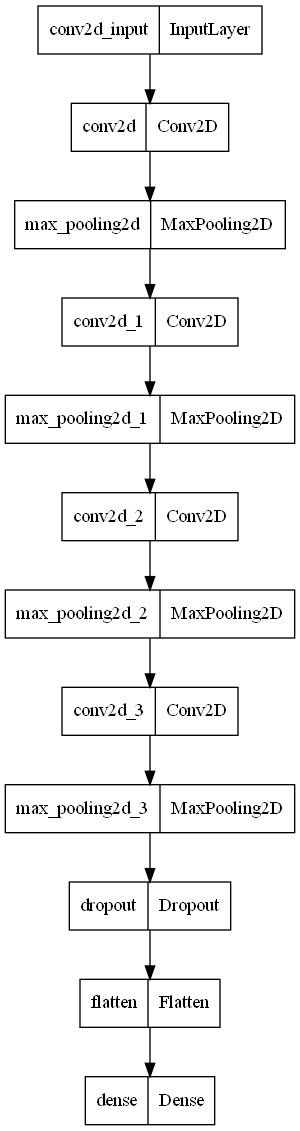

In [16]:
import tensorflow as tf
import pydot
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=False, show_layer_names=True)


### SUMMARY OF MODEL

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

- Convolutional Layers: The model includes multiple convolutional layers (conv2d, conv2d_1, conv2d_2, conv2d_3), which are fundamental to processing image data. These layers apply filters to the input images to detect spatial hierarchies of features (like edges in the initial layers and more complex patterns in deeper layers). This makes CNNs highly effective for tasks involving image data.

- Pooling Layers: Following each convolutional layer, there is a max pooling layer (max_pooling2d, max_pooling2d_1, max_pooling2d_2, max_pooling2d_3). Pooling layers reduce the dimensions of the feature maps, decreasing the computational load, and helping to extract the dominant features by reducing the resolution. This contributes to the model's ability to generalize well from the training data.

- Dropout Layer: The inclusion of a dropout layer (dropout) helps in preventing overfitting, which is a common problem in deep learning models. By randomly dropping units from the neural network during training, it ensures that the model does not rely too heavily on any single neuron, thereby increasing its generalization capabilities.

- Flatten and Dense Layers: After extracting and pooling features through convolutional and max pooling layers, the model flattens the output and feeds it into a dense layer (dense). This structure allows the model to learn non-linear combinations of the high-level features extracted by the convolutional layers to perform classification.

- Output Configuration: The final dense layer has 3 units, indicating that the model is designed for a classification task with three possible outcomes. This is typical for multi-class classification problems.

- Efficiency and Effectiveness: The model strikes a balance between complexity and effectiveness. With around 450,627 parameters, it is complex enough to learn detailed features from image data but not so large as to be excessively prone to overfitting or to require an inordinate amount of computational resources for training.

- General Applicability to Image Data: CNNs are inherently suited to image data due to their ability to process the data in its raw form, preserving the spatial relationships between pixels. This makes them superior to fully connected networks for tasks involving images.

### COMPILE MODEL

In [18]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


### TRAIN MODEL

In [19]:
# Fitting the data
    
history = model.fit_generator(train_generator,
    epochs=30, # epochs used to how many itertion (1fp + loss + 1bp)
    validation_data = val_generator,
)

Epoch 1/30


6/6 [==============================] - 7s 711ms/step - loss: 1.1271 - accuracy: 0.3579 - val_loss: 1.0956 - val_accuracy: 0.3636
Epoch 2/30
6/6 [==============================] - 4s 617ms/step - loss: 1.0996 - accuracy: 0.3474 - val_loss: 1.0822 - val_accuracy: 0.4545
Epoch 3/30
6/6 [==============================] - 4s 654ms/step - loss: 1.0969 - accuracy: 0.3263 - val_loss: 1.0640 - val_accuracy: 0.5455
Epoch 4/30
6/6 [==============================] - 4s 624ms/step - loss: 1.0587 - accuracy: 0.4105 - val_loss: 1.0341 - val_accuracy: 0.3636
Epoch 5/30
6/6 [==============================] - 4s 697ms/step - loss: 1.0109 - accuracy: 0.4842 - val_loss: 1.0250 - val_accuracy: 0.5455
Epoch 6/30
6/6 [==============================] - 4s 638ms/step - loss: 0.9679 - accuracy: 0.4737 - val_loss: 1.2175 - val_accuracy: 0.2727
Epoch 7/30
6/6 [==============================] - 4s 640ms/step - loss: 0.9993 - accuracy: 0.5053 - val_loss: 1.0582 - val_accuracy: 0.5455
Epoch 8/30
6/6 [==

The trained model's performance is evaluated using the validation set. This step is crucial to adjust model parameters and make decisions on how to improve the model before final testing.

### AFTER TRAINING
* Validation accuracy - 71.67%
* Training accuracy -  62.38%

The simple CNN achieves an accuracy of approximately 62% on the test set. 

### PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS

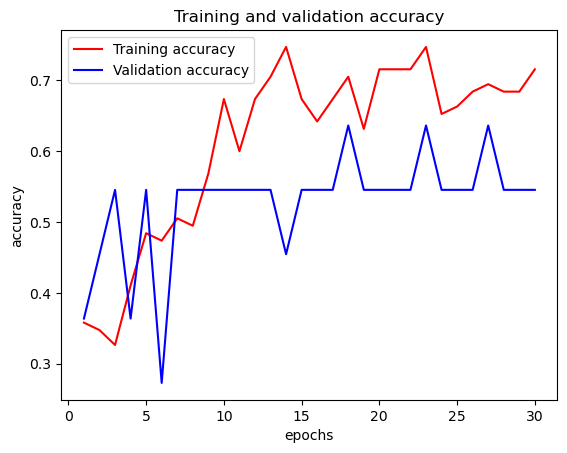

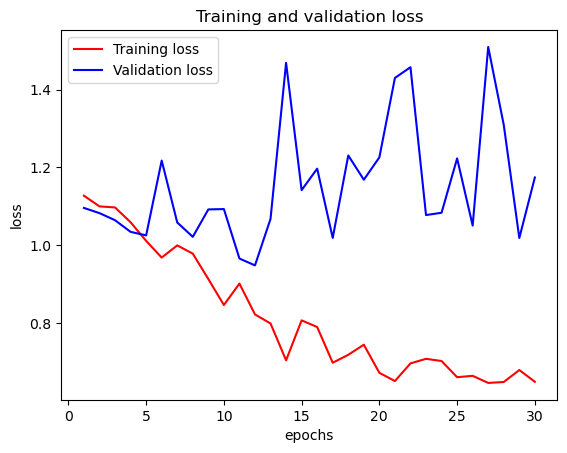

In [21]:
# Step:9 Plotting the training accuracy and validation accuracy
# Plotting the traning loss and validation loss
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

The graphs show the training and validation accuracy and loss for a simple CNN over 30 epochs. The training accuracy improves while the validation accuracy fluctuates, indicating overfitting. The training loss decreases steadily, but the validation loss is erratic, further suggesting that the model does not generalize well.

In conclusion, while the CNN learns from the training data, as evidenced by reduced loss and increased accuracy, the high variance in validation metrics highlights a need for better regularization and model tuning to enhance generalization to new data.

### CREATED MODEL SUMMARY

In [22]:
model = tf.keras.models.load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

### EVALUATION AND TESTING MODEL

In [23]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 13 images belonging to 3 classes.


In [24]:
model.evaluate(test_generator)


1/1 [==============================] - 1s 558ms/step - loss: 1.2530 - accuracy: 0.4615


[1.2530280351638794, 0.4615384638309479]

* Here the loss is 1.2530 and the accuracy of the model is 0.4615 percent means 46%.

### VISUALISE THE PREDICTION OF MODEL

1/1 [==============================] - 0s 60ms/step


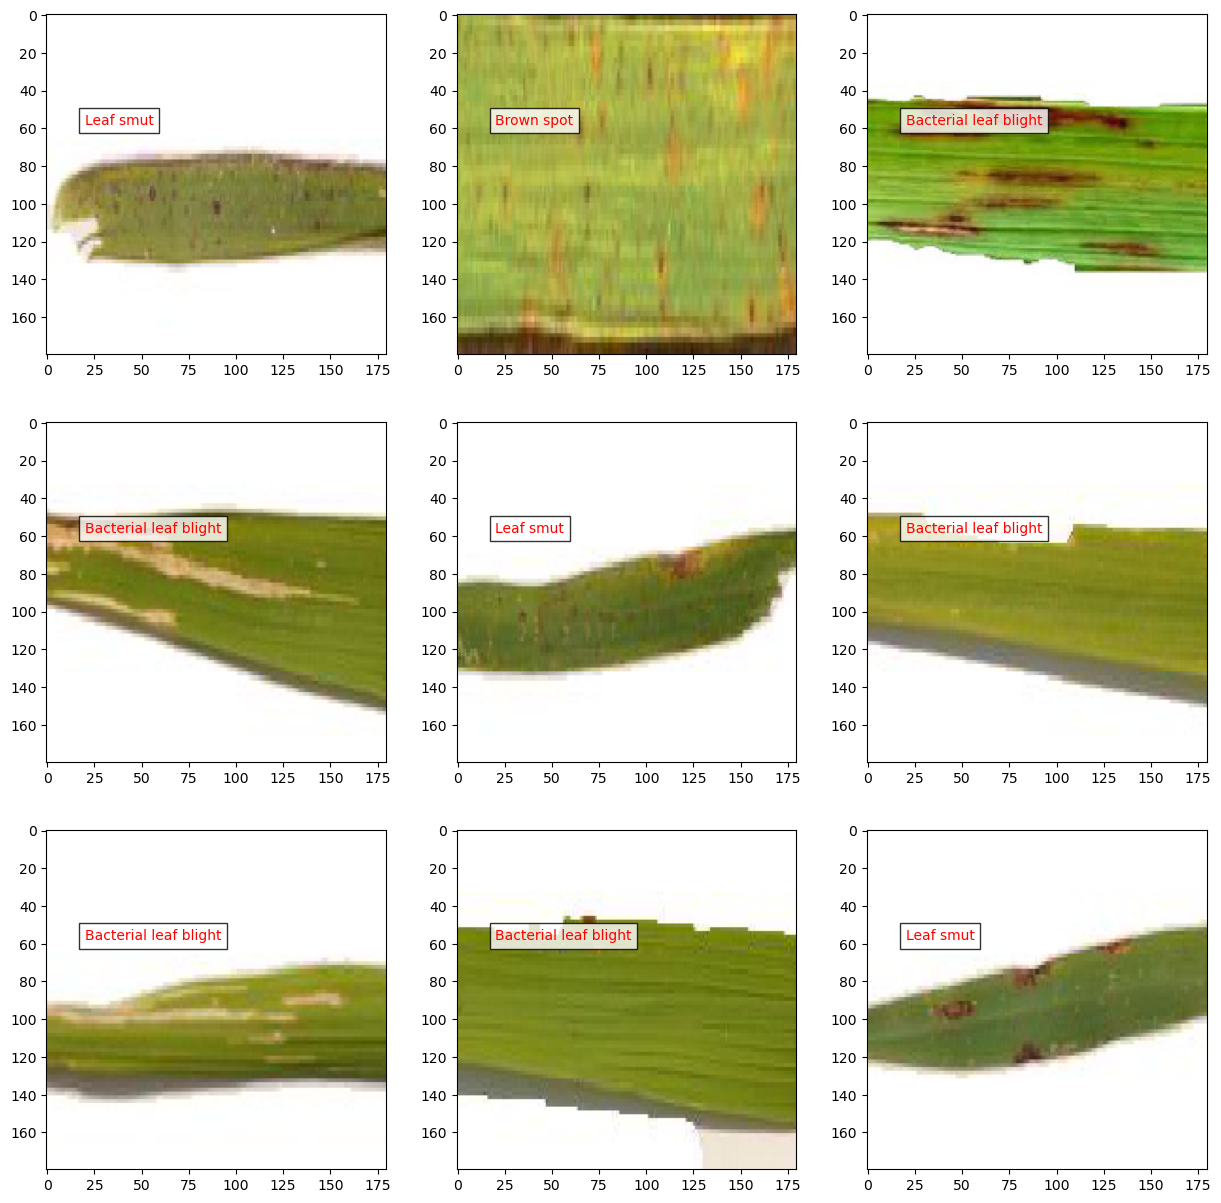

In [25]:
# Visualise the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])




<h2> VGG16, VGG19 and Xception </h2>

Switching to more advanced architectures like VGG16, VGG19, and Xception is a common approach to improve performance on image classification tasks, especially when initial models do not yield satisfactory results. Here’s a brief overview of each:

### VGG16
VGG16 is a deep convolutional neural network model proposed by the Visual Geometry Group from the University of Oxford, which is why it's named VGG. It has 16 layers that have weights, consisting of 13 convolutional layers and 3 fully connected layers at the end. The model is known for its simplicity, using only 3x3 convolutional layers stacked on top of each other in increasing depth. Despite its simplicity, VGG16 has been highly effective in image recognition tasks, providing a good balance between accuracy and computational efficiency. It's widely used as a feature extractor for transfer learning tasks.

### VGG19
VGG19 is an extension of the VGG16 model, containing 19 layers with weights. It follows the same architecture as VGG16 but includes 3 additional convolutional layers. This increases the depth of the network, allowing it to learn more complex features at the cost of higher computational complexity. Like VGG16, VGG19 has shown impressive performance on various image classification challenges and is also commonly used for transfer learning, where pre-trained models are fine-tuned for specific tasks.

### Xception
Xception, short for "Extreme Inception," is a convolutional neural network model introduced by François Chollet, the creator of the Keras library. It builds on the Inception model by replacing the standard Inception modules with depthwise separable convolutions. This means that it performs spatial convolutions on each channel of the input separately before using a pointwise convolution to combine the outputs, which significantly reduces the number of parameters and computational cost while maintaining or even increasing model performance. Xception is particularly noted for its efficiency and accuracy in handling image classification tasks, making it an excellent choice for scenarios where both performance and computational efficiency are critical.

Each of these models brings distinct advantages in terms of architectural innovations and performance on image classification tasks. They have been pre-trained on large datasets like ImageNet, making them suitable for transfer learning where they can be fine-tuned on a specific dataset to achieve high accuracy, even when the available training data is relatively limited.

Importing Required Modules

In [36]:
from tensorflow.keras.applications import VGG16, VGG19, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


### Function to Build Models

In [27]:
def build_model(base_model, num_classes):
    # Freezing the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False
    
    # Adding custom layers on top of the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    # This is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [37]:
num_classes = 3  

# VGG16 model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
model_vgg16 = build_model(base_model_vgg16, num_classes)

# VGG19 model
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
model_vgg19 = build_model(base_model_vgg19, num_classes)

# Xception model
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
model_xception = build_model(base_model_xception, num_classes)


<h4> Model Summary - VGG16 </h4>

In [30]:

history_vgg16 = model_vgg16.fit(train_generator,
                                epochs=30,
                                validation_data=val_generator)




Epoch 1/30
6/6 [==============================] - 22s 3s/step - loss: 1.2879 - accuracy: 0.2737 - val_loss: 1.1339 - val_accuracy: 0.3636
Epoch 2/30
6/6 [==============================] - 20s 3s/step - loss: 0.9063 - accuracy: 0.6105 - val_loss: 1.2217 - val_accuracy: 0.1818
Epoch 3/30
6/6 [==============================] - 20s 3s/step - loss: 0.8380 - accuracy: 0.5895 - val_loss: 1.0418 - val_accuracy: 0.6364
Epoch 4/30
6/6 [==============================] - 17s 3s/step - loss: 0.7606 - accuracy: 0.6947 - val_loss: 1.0706 - val_accuracy: 0.5455
Epoch 5/30
6/6 [==============================] - 21s 4s/step - loss: 0.7161 - accuracy: 0.6632 - val_loss: 1.1360 - val_accuracy: 0.3636
Epoch 6/30
6/6 [==============================] - 20s 3s/step - loss: 0.6254 - accuracy: 0.7474 - val_loss: 0.9951 - val_accuracy: 0.5455
Epoch 7/30
6/6 [==============================] - 20s 3s/step - loss: 0.5396 - accuracy: 0.8105 - val_loss: 1.1759 - val_accuracy: 0.3636
Epoch 8/30
6/6 [==================

<h4> Model Summary - VGG19 </h4>

In [31]:

history_vgg19 = model_vgg19.fit(train_generator,
                                epochs=30,
                                validation_data=val_generator)

Epoch 1/30
6/6 [==============================] - 28s 4s/step - loss: 1.1148 - accuracy: 0.3789 - val_loss: 1.0480 - val_accuracy: 0.4545
Epoch 2/30
6/6 [==============================] - 15s 2s/step - loss: 0.9267 - accuracy: 0.5789 - val_loss: 1.0503 - val_accuracy: 0.3636
Epoch 3/30
6/6 [==============================] - 8s 1s/step - loss: 0.8090 - accuracy: 0.6842 - val_loss: 0.9567 - val_accuracy: 0.6364
Epoch 4/30
6/6 [==============================] - 8s 1s/step - loss: 0.8222 - accuracy: 0.6526 - val_loss: 0.9902 - val_accuracy: 0.5455
Epoch 5/30
6/6 [==============================] - 7s 1s/step - loss: 0.7826 - accuracy: 0.6947 - val_loss: 0.9278 - val_accuracy: 0.6364
Epoch 6/30
6/6 [==============================] - 7s 1s/step - loss: 0.8235 - accuracy: 0.6421 - val_loss: 0.9460 - val_accuracy: 0.4545
Epoch 7/30
6/6 [==============================] - 7s 1s/step - loss: 0.7074 - accuracy: 0.6737 - val_loss: 1.0886 - val_accuracy: 0.5455
Epoch 8/30
6/6 [=======================

<h4> Model Summary - Xception </h4>

In [32]:
history_xception = model_xception.fit(train_generator,
                                epochs=30,
                                validation_data=val_generator)

Epoch 1/30
6/6 [==============================] - 6s 603ms/step - loss: 0.9257 - accuracy: 0.6211 - val_loss: 1.4322 - val_accuracy: 0.4545
Epoch 2/30
6/6 [==============================] - 3s 446ms/step - loss: 0.4177 - accuracy: 0.8105 - val_loss: 1.0694 - val_accuracy: 0.5455
Epoch 3/30
6/6 [==============================] - 3s 446ms/step - loss: 0.2096 - accuracy: 0.9053 - val_loss: 1.5593 - val_accuracy: 0.6364
Epoch 4/30
6/6 [==============================] - 3s 443ms/step - loss: 0.1622 - accuracy: 0.9368 - val_loss: 1.0679 - val_accuracy: 0.5455
Epoch 5/30
6/6 [==============================] - 3s 454ms/step - loss: 0.1437 - accuracy: 0.9789 - val_loss: 1.2964 - val_accuracy: 0.4545
Epoch 6/30
6/6 [==============================] - 3s 449ms/step - loss: 0.1513 - accuracy: 0.9579 - val_loss: 1.0057 - val_accuracy: 0.7273
Epoch 7/30
6/6 [==============================] - 3s 456ms/step - loss: 0.1056 - accuracy: 0.9474 - val_loss: 0.9338 - val_accuracy: 0.5455
Epoch 8/30
6/6 [====

<h4>Plotting the Train Accuracy and Loss </h4>

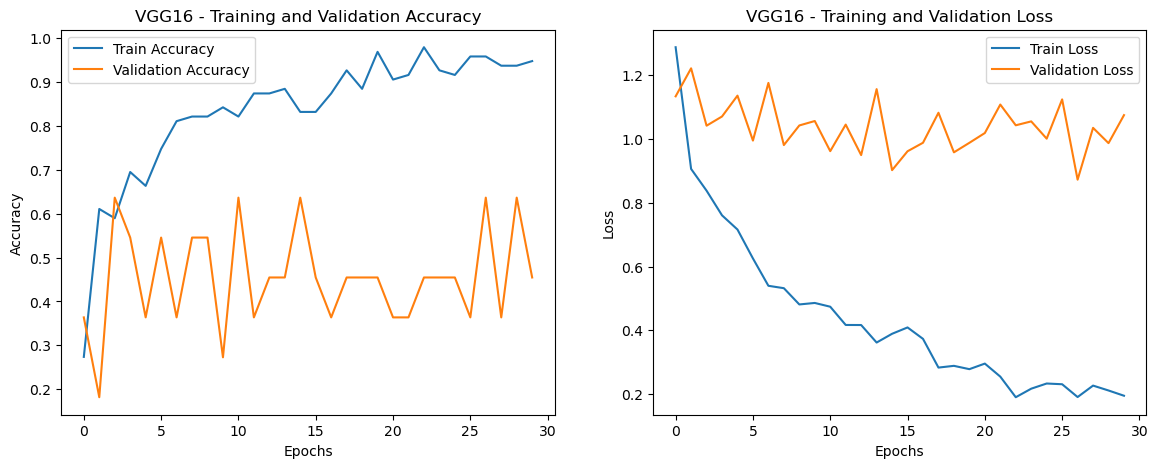

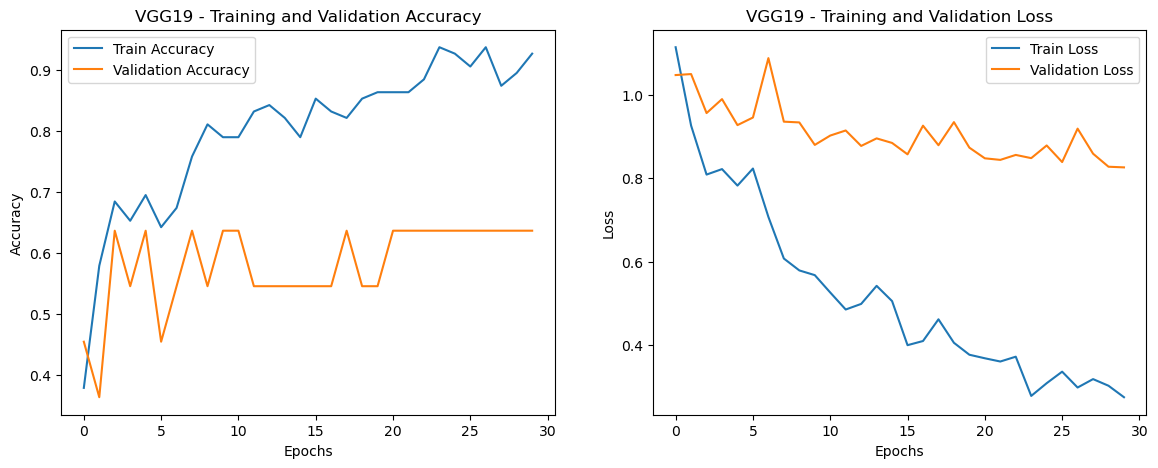

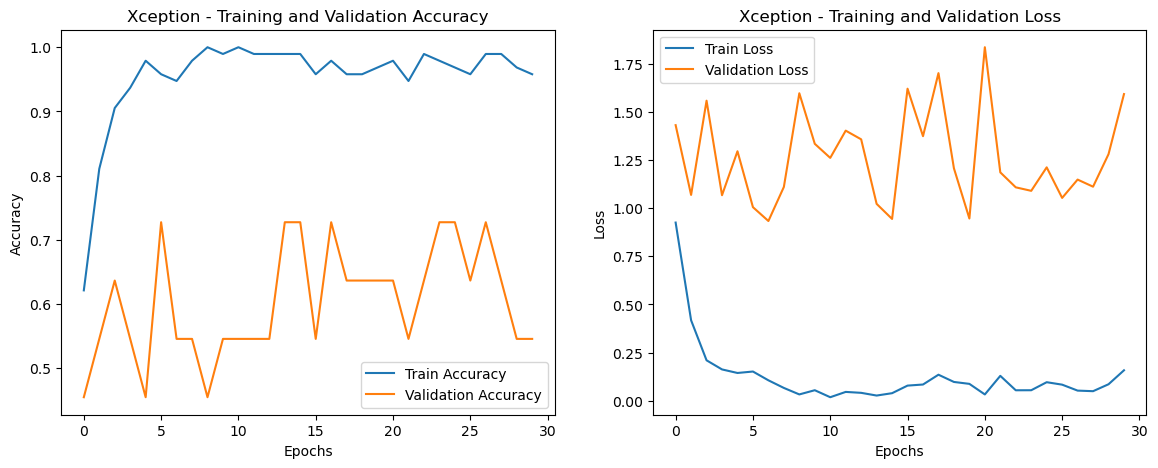

In [35]:
import matplotlib.pyplot as plt

histories = [history_vgg16, history_vgg19, history_xception]
model_names = ['VGG16', 'VGG19', 'Xception']

for history, name in zip(histories, model_names):
    plt.figure(figsize=(14, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()


| Base model                                      | Accuracy |
|----|----|
|Basic Model | 54.4\% | 
| VGG16| 66\% |
|VGG19                                           | 64.2\%   |
|XCeption                                        | 70.0\%   |


The provided graphs show the training and validation accuracy and loss for three different models: VGG16, VGG19, and Xception, over 30 epochs.

**VGG16 Model Evaluation:**
- Training Accuracy: High, showing the model is learning effectively.
- Validation Accuracy: Much lower than training, suggesting overfitting.
- Training Loss: Decreases consistently, indicating good learning on the training set.
- Validation Loss: Starts high and decreases slightly but remains quite volatile, reinforcing the indication of overfitting.

**VGG19 Model Evaluation:**
- Training Accuracy: Shows improvement and is relatively high.
- Validation Accuracy: Considerably lower than training accuracy with some volatility, indicating possible overfitting.
- Training Loss: Consistent downward trend, suggesting the model is learning.
- Validation Loss: Decreases but with fluctuations, which may point towards the model's struggle to generalize.

**Xception Model Evaluation:**
- Training Accuracy: Very high, suggesting excellent learning on the training data.
- Validation Accuracy: Significantly lower, with a lot of fluctuation, which might imply overfitting to the training data.
- Training Loss: Low and improving, a sign of good fit on training data.
- Validation Loss: High initial loss that decreases but remains erratic, again suggesting overfitting issues.

**Conclusion:**
All three models show high training accuracy and decreasing training loss, which is indicative of effective learning. However, the validation accuracy for each model is significantly lower, and the validation loss is more erratic compared to the training loss, suggesting that all models are overfitting. Xception shows the most promise with the highest training accuracy but also exhibits a large discrepancy between training and validation results. Fine-tuning and regularization strategies may be needed to improve the models' generalization to unseen data.